# Lead Scoring Case Study

### Problem Statement

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%.

### Business Goal

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"F:\upGrad\ML\Lead Scoring Case Study\Lead Scoring Assignment\Leads.csv")

In [3]:
df.shape

(9240, 37)

###  imbalance check

In [4]:
df["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [5]:
# 61% and 39%

# Data Cleaning

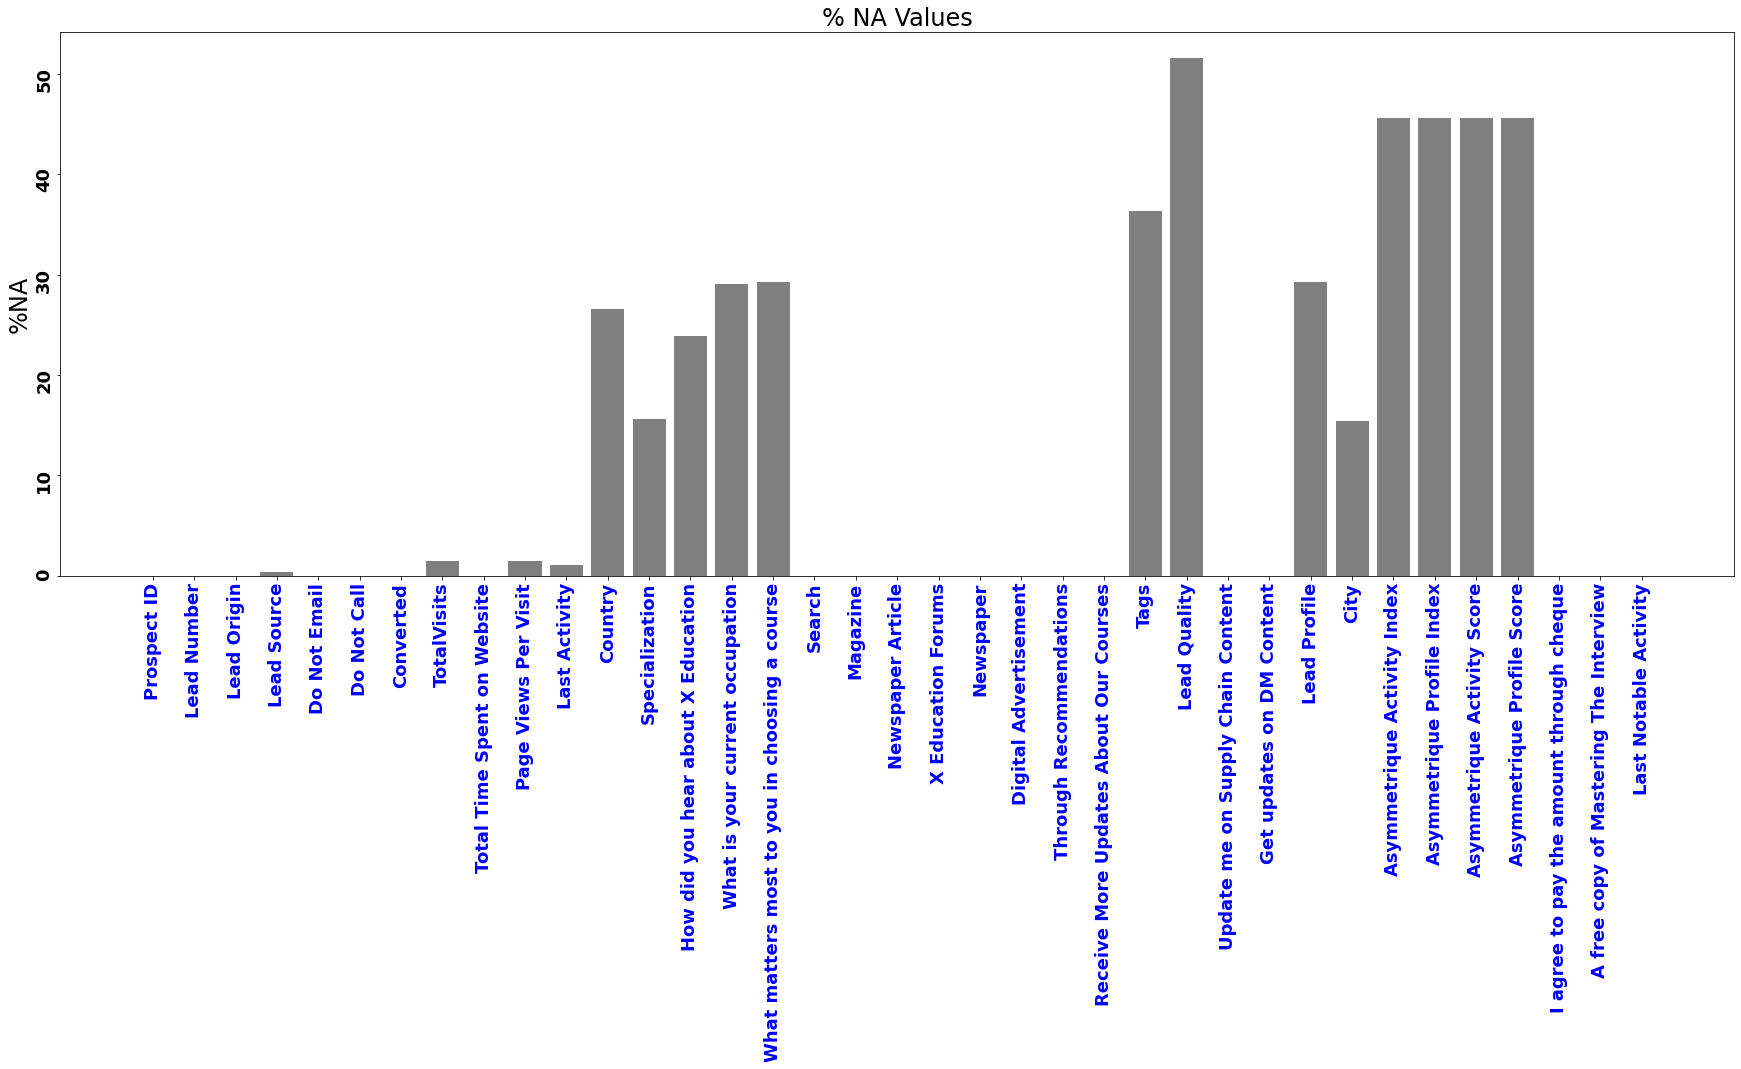

In [6]:
plt.figure(figsize=(30, 10))
plt.bar(x=df.columns,height = round(df.isnull().sum()/len(df)*100,1),color = "grey")
plt.xticks(rotation=90,color="blue",fontweight="bold",fontsize=18)
plt.yticks(rotation=90,color="black",fontweight="bold",fontsize=18)
plt.ylabel("%NA",fontsize=24)
plt.title("% NA Values",fontsize=24)
plt.show()

## Drop columns NA >35%

In [7]:
for x in df.columns:
    if (df[x].isnull().sum()/len(df))*100>35:
        df.drop(x,axis=1,inplace=True)
       

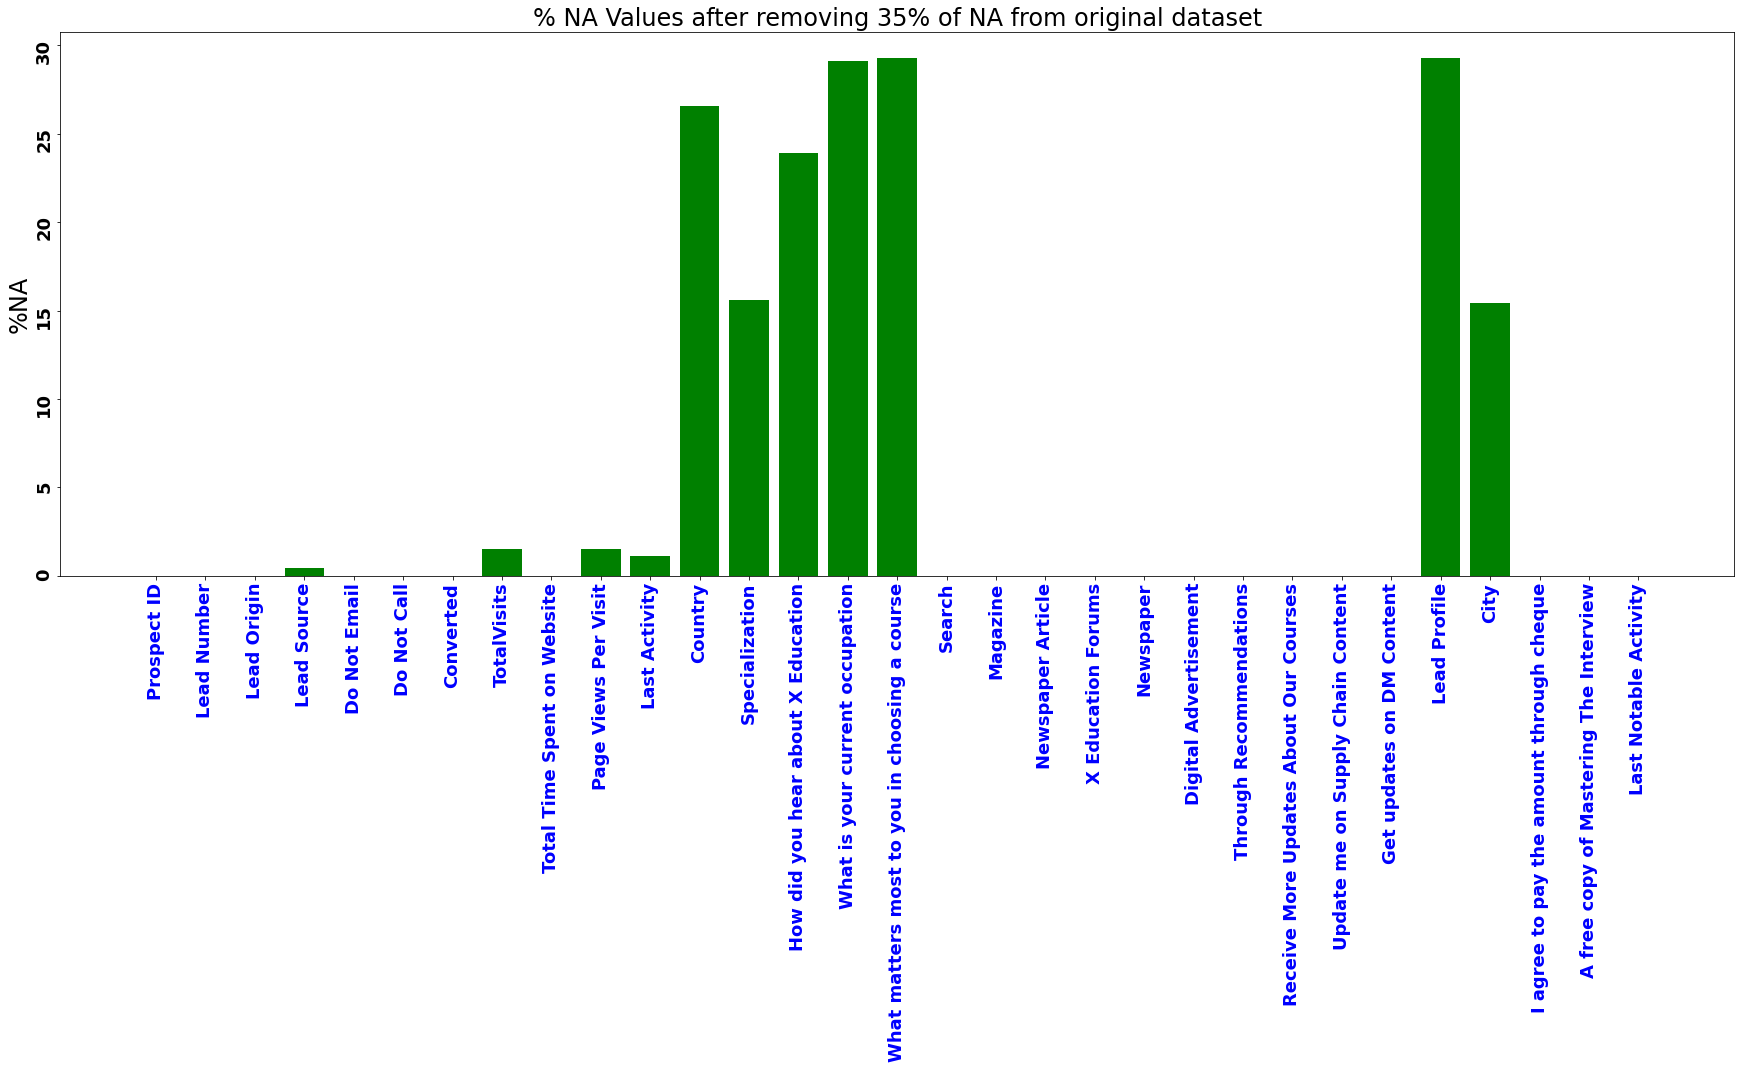

In [8]:
plt.figure(figsize=(30, 10))
plt.bar(x=df.columns,height = round(df.isnull().sum()/len(df)*100,1),color = "green")
plt.xticks(rotation=90,color="blue",fontweight="bold",fontsize=18)
plt.yticks(rotation=90,color="black",fontweight="bold",fontsize=18)
plt.ylabel("%NA",fontsize=24)
plt.title("% NA Values after removing 35% of NA from original dataset",fontsize=24)
plt.show()

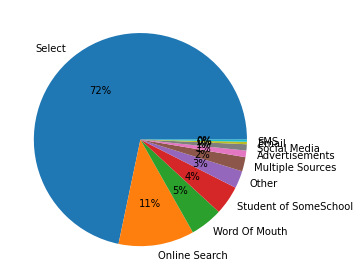

In [9]:
plt.pie(df['How did you hear about X Education'].value_counts(),
       labels = df['How did you hear about X Education'].value_counts().index,
       autopct = "%1.0f%%",
       )
plt.tight_layout()
plt.show()


In [10]:
df['How did you hear about X Education'].value_counts()/len(df['How did you hear about X Education'])*100

Select                   54.577922
Online Search             8.744589
Word Of Mouth             3.766234
Student of SomeSchool     3.354978
Other                     2.012987
Multiple Sources          1.645022
Advertisements            0.757576
Social Media              0.725108
Email                     0.281385
SMS                       0.248918
Name: How did you hear about X Education, dtype: float64

In [11]:
df['How did you hear about X Education'].isnull().sum()/len(df)*100

23.885281385281385

In [12]:
# How did you hear about X Education has 23% Null and 55% select (equivalent to Null). It can be dropped
df.drop('How did you hear about X Education',axis=1,inplace=True)

In [13]:
round(df["Country"].value_counts()/len(df["Country"])*100,1)

India                   70.3
United States            0.7
United Arab Emirates     0.6
Singapore                0.3
Saudi Arabia             0.2
United Kingdom           0.2
Australia                0.1
Qatar                    0.1
Hong Kong                0.1
Bahrain                  0.1
Oman                     0.1
France                   0.1
unknown                  0.1
South Africa             0.0
Nigeria                  0.0
Germany                  0.0
Kuwait                   0.0
Canada                   0.0
Sweden                   0.0
China                    0.0
Asia/Pacific Region      0.0
Uganda                   0.0
Bangladesh               0.0
Italy                    0.0
Belgium                  0.0
Netherlands              0.0
Ghana                    0.0
Philippines              0.0
Russia                   0.0
Switzerland              0.0
Vietnam                  0.0
Denmark                  0.0
Tanzania                 0.0
Liberia                  0.0
Malaysia      

In [14]:
# Country has 23% Null and 70% from India.It may create imbalance and  It can be dropped
df.drop('Country',axis=1,inplace=True)

In [15]:
df["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [16]:
# Same as Country, City has skewed data (Mumbai and Select)  and  It can be dropped
df.drop('City',axis=1,inplace=True)

In [17]:
df.drop('Lead Profile',axis=1,inplace=True)

In [18]:
df.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [19]:
print("The data set has now {} features".format(df.shape[1]))

The data set has now 25 features


In [20]:
df.isnull().sum()/len(df)*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [21]:
df.dropna(inplace = True)

In [22]:
df.shape

(6372, 25)

In [23]:
df.isnull().sum()/len(df)*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

### Now dataset has 6372 rows (69% of original dataset) after removing Null values
### Dataset has 25 features after removing features with greater than 35% NA and skewed data

# EDA

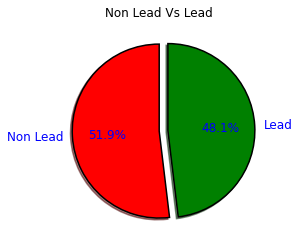

In [24]:
plt.pie(df["Converted"].value_counts(),
        explode=[0,0.1],
        colors=["red","green"],
        wedgeprops = {'linewidth': 1.5,"edgecolor":"k"},
        shadow =True,
        autopct = "%1.1f%%",
        labels=["Non Lead","Lead"],
        textprops={'color': "blue","fontsize":12},
        startangle=90)
plt.title("Non Lead Vs Lead")
plt.show()

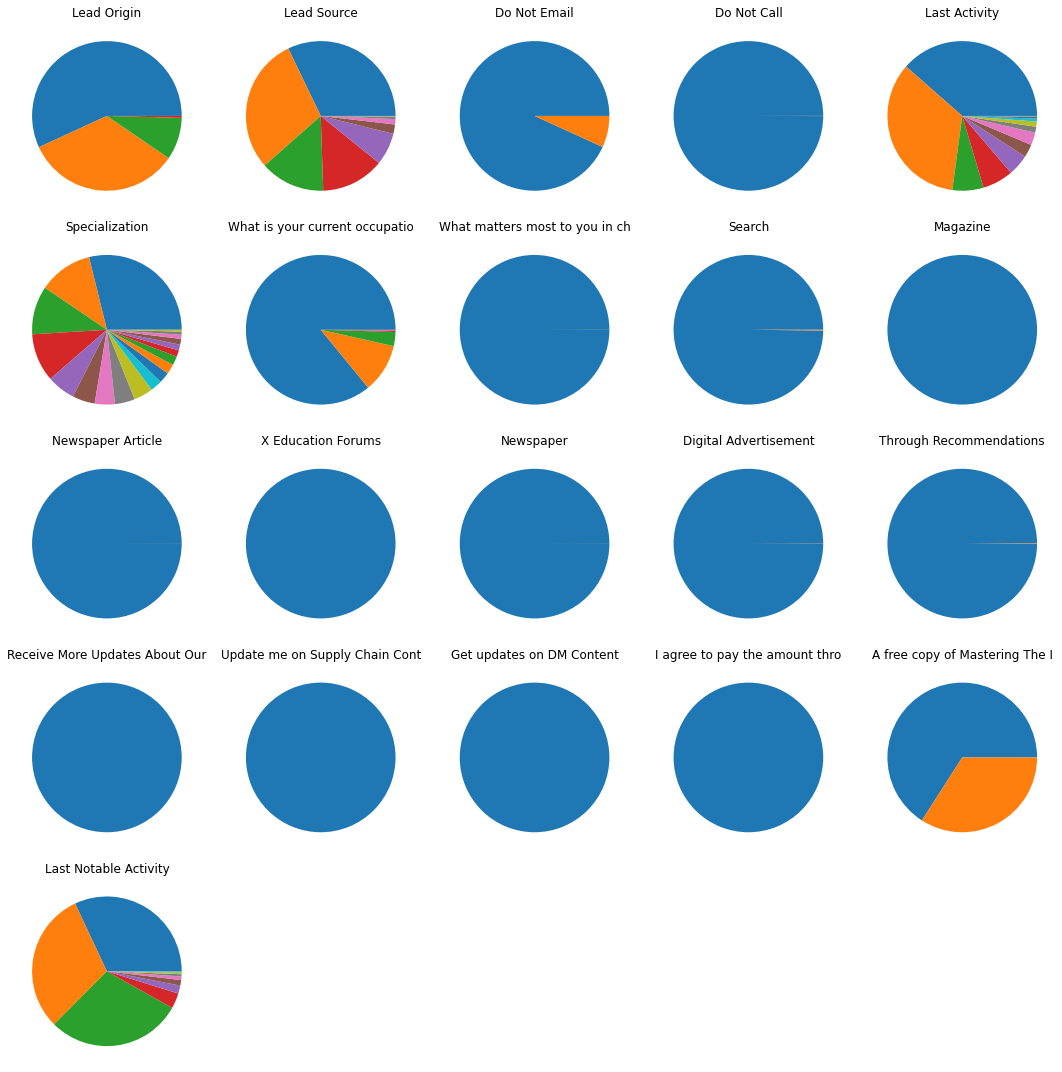

In [25]:
plt.figure(figsize=(15, 15))
for n, col in enumerate(df.select_dtypes("object")):
    plt.subplot(5,5,n+1)
    plt.pie(df[col].value_counts())    
    plt.title(col[:30],)

    plt.tight_layout()
plt.show()

In [26]:
# As shown in pie chart above most of columns customers were not responded on didnt disclose.
# These columns dont give any valuable information.
# These columns can be removed

In [27]:
no_dist = df.select_dtypes("object").columns.to_list()

In [28]:
for items in ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']:
    no_dist.remove(items)

In [29]:
df.drop(no_dist,axis = 1, inplace=True)

In [30]:
print("The data set has now {} features".format(df.shape[1]))

The data set has now 11 features


# Univariate Analysis

### 1 means it was converted and 0 means it wasn’t converted

In [31]:
df.groupby("Lead Origin")["Converted"].value_counts()

Lead Origin              Converted
API                      0            1186
                         1             954
Landing Page Submission  0            2066
                         1            1558
Lead Add Form            1             544
                         0              37
Lead Import              0              18
                         1               9
Name: Converted, dtype: int64

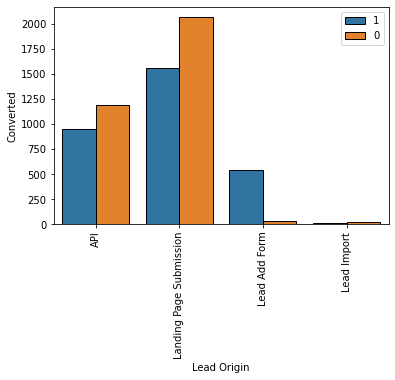

In [32]:
hue_order = [1,0]
#kwargs = {'alpha':0.9, 'linestyle':':', 'linewidth':5, 'edgecolor':'black'}
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "Lead Origin",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

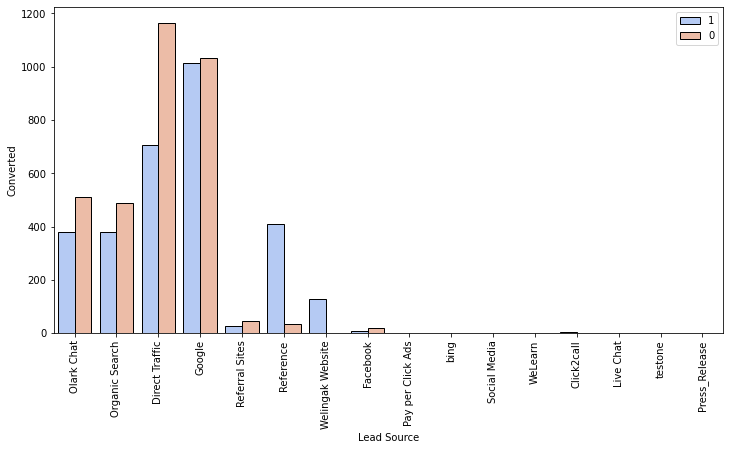

In [33]:
plt.figure(figsize = (12,6))
hue_order = [1,0]
#kwargs = {'alpha':0.9, 'linestyle':':', 'linewidth':5, 'edgecolor':'black'}
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "Lead Source",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
            palette = "coolwarm",
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

### Considerable Leads are from Reference 

In [34]:
df["Specialization"] = df["Specialization"].apply(lambda x: np.nan if x == "Select" else x)

In [35]:
df["Specialization"].value_counts()

Finance Management                   745
Human Resource Management            665
Marketing Management                 663
Operations Management                391
Business Administration              310
IT Projects Management               278
Supply Chain Management              275
Banking, Investment And Insurance    266
Media and Advertising                161
Travel and Tourism                   149
International Business               136
Healthcare Management                122
Hospitality Management                90
E-COMMERCE                            80
Retail Management                     78
Rural and Agribusiness                57
E-Business                            43
Services Excellence                   25
Name: Specialization, dtype: int64

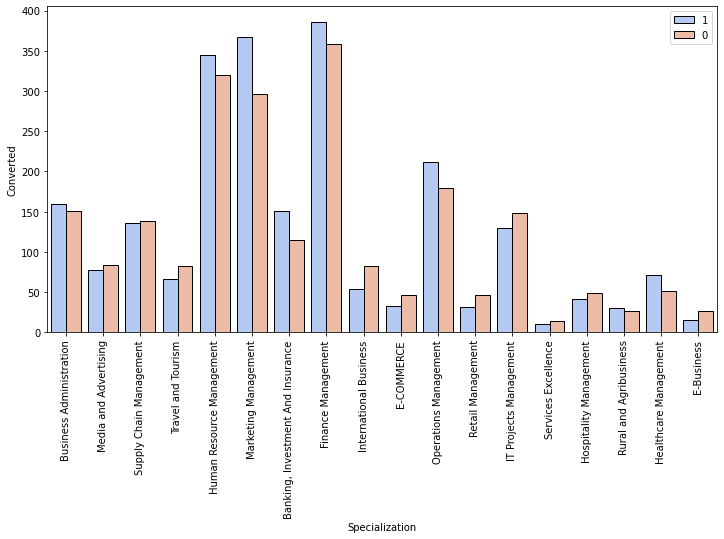

In [36]:
plt.figure(figsize = (12,6))
hue_order = [1,0]
#kwargs = {'alpha':0.9, 'linestyle':':', 'linewidth':5, 'edgecolor':'black'}
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "Specialization",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
            palette = "coolwarm",
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

In [37]:
df.rename(columns={"What is your current occupation":"current occupation"},inplace="True")

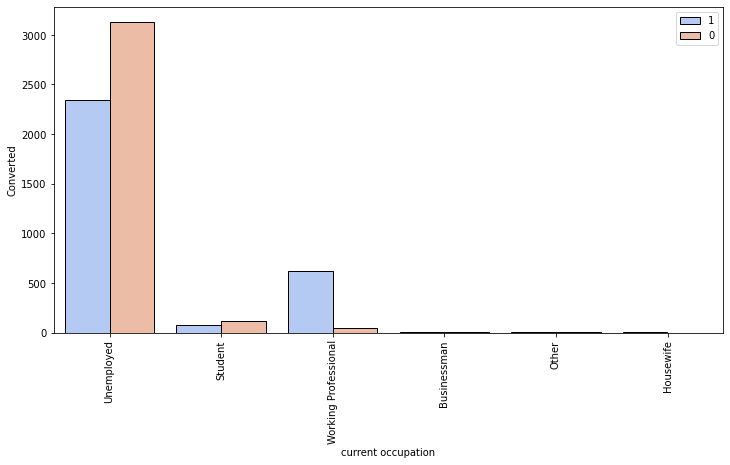

In [38]:
plt.figure(figsize = (12,6))
hue_order = [1,0]
#kwargs = {'alpha':0.9, 'linestyle':':', 'linewidth':5, 'edgecolor':'black'}
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "current occupation",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
            palette = "coolwarm",
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

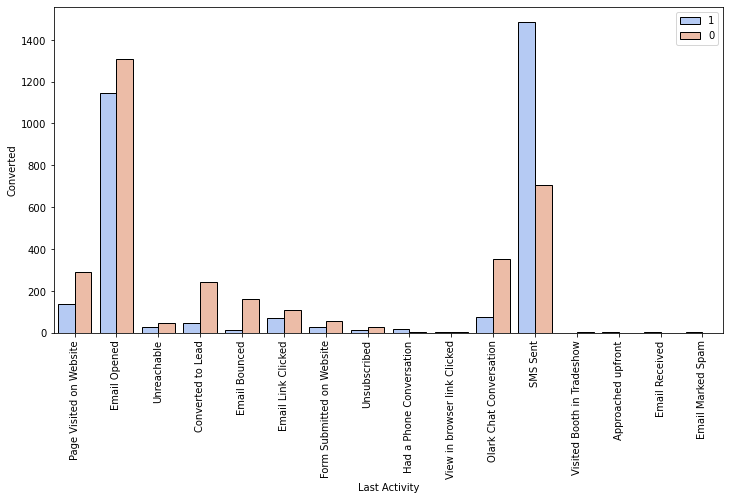

In [39]:
plt.figure(figsize = (12,6))
hue_order = [1,0]
#kwargs = {'alpha':0.9, 'linestyle':':', 'linewidth':5, 'edgecolor':'black'}
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "Last Activity",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
            palette = "coolwarm",
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

In [40]:
df.rename(columns={"A free copy of Mastering The Interview":"free interview copy"},inplace =True)

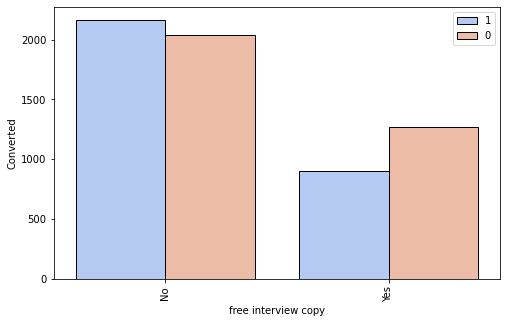

In [41]:
plt.figure(figsize = (8,5))
hue_order = [1,0]
#kwargs = {'alpha':0.9, 'linestyle':':', 'linewidth':5, 'edgecolor':'black'}
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "free interview copy",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
            palette = "coolwarm",
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

In [42]:
df["Last Notable Activity"].value_counts()

Email Opened                    2038
Modified                        1947
SMS Sent                        1869
Page Visited on Website          212
Email Link Clicked               110
Olark Chat Conversation           76
Email Bounced                     49
Unsubscribed                      31
Unreachable                       22
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

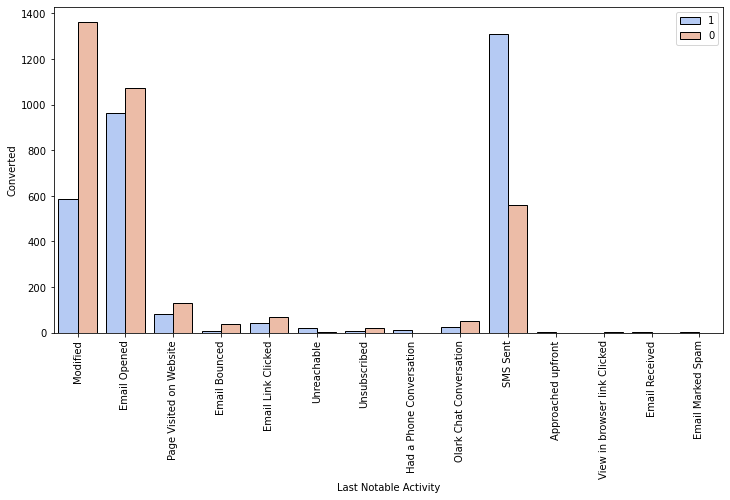

In [43]:
plt.figure(figsize = (12,6))
hue_order = [1,0]
kwargs = {'linewidth':1, 'edgecolor':'black'}

sns.barplot(data = df,x= "Last Notable Activity",
            y="Converted",hue = "Converted",
            estimator= len,
            hue_order = hue_order,
            palette = "coolwarm",
           **kwargs)
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

In [44]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.481011,3.606717,535.279190,2.479565
std,0.499678,4.852274,565.402288,2.166345
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,34.000000,1.000000
50%,0.000000,3.000000,287.000000,2.000000
75%,1.000000,5.000000,1022.250000,3.500000
max,1.000000,251.000000,2272.000000,55.000000


In [45]:
numer = df.select_dtypes(["int","float"]).columns.to_list()
numer = numer[1:]
numer

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

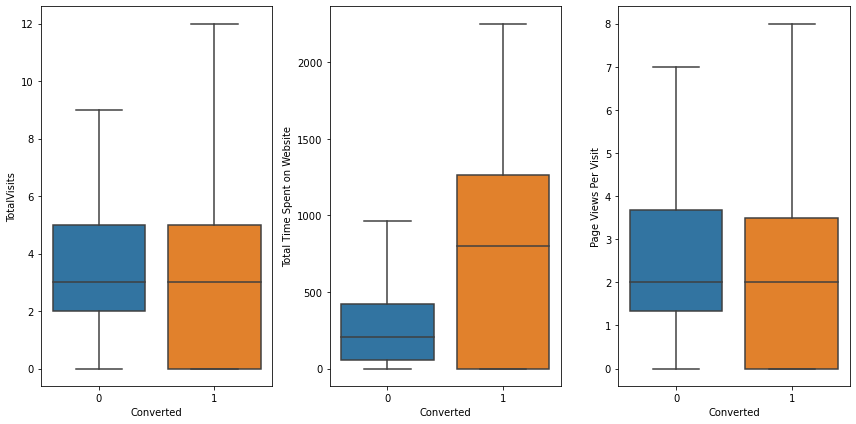

In [46]:
plt.figure(figsize=(12,6))
n=1
for i in numer:
    plt.subplot(1,3,n)
    sns.boxplot(data=df,x="Converted",y=i,showfliers=False)
    n+=1
plt.tight_layout()

# Bivariate/Multivariate Analysis

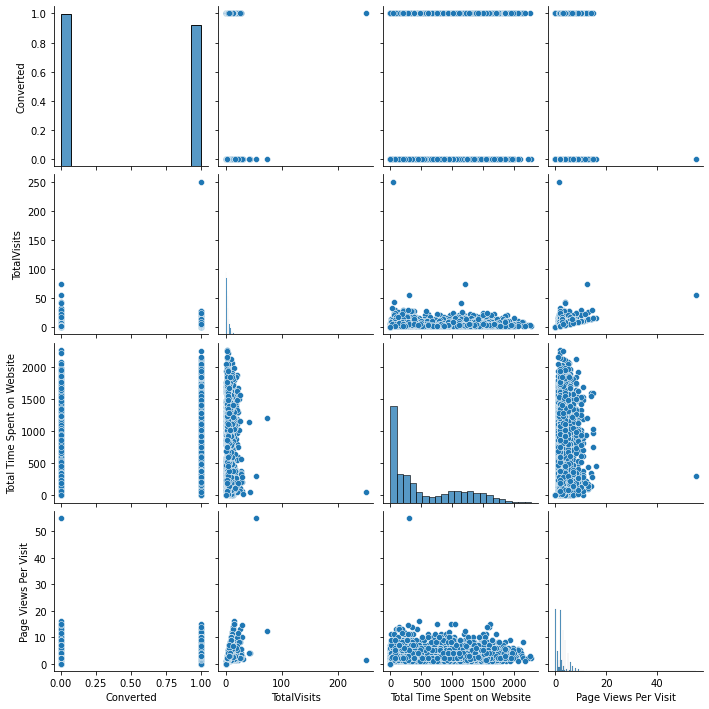

In [47]:
sns.pairplot(df)

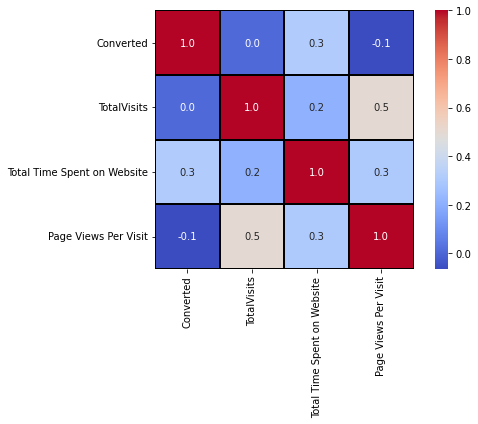

In [48]:
def_corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(def_corr,annot=True, fmt='.1f', cmap="coolwarm",linewidth=0.05, linecolor='k', square=True)
plt.tight_layout()

# Weight of Evidence (WoE) & Information Value (IV)

In [49]:
for item in df.select_dtypes("object").columns.to_list():
    print("Number of categories in {} is {}".format(item,df[item].nunique()))

Number of categories in Lead Origin is 4
Number of categories in Lead Source is 16
Number of categories in Last Activity is 16
Number of categories in Specialization is 18
Number of categories in current occupation is 6
Number of categories in free interview copy is 2
Number of categories in Last Notable Activity is 14


In [50]:
WOE_leadsource = pd.crosstab(index = df['Lead Source'],columns = df["Converted"],normalize='columns')
WOE_leadsource["WOE"] = WOE_leadsource.apply(lambda x: np.log(x[1] / x[0]),axis=1)
WOE_leadsource['WOE'] = WOE_leadsource['WOE'].replace([np.inf, -np.inf], np.nan).fillna(0)
WOE_leadsource['IV'] = WOE_leadsource.apply(lambda x: np.sum(x['WOE']* (x[1]-x[0])),axis=1)
print("Lead_source_IV is {}".format(round(np.sum(WOE_leadsource['IV']),2)))

Lead_source_IV is 0.56


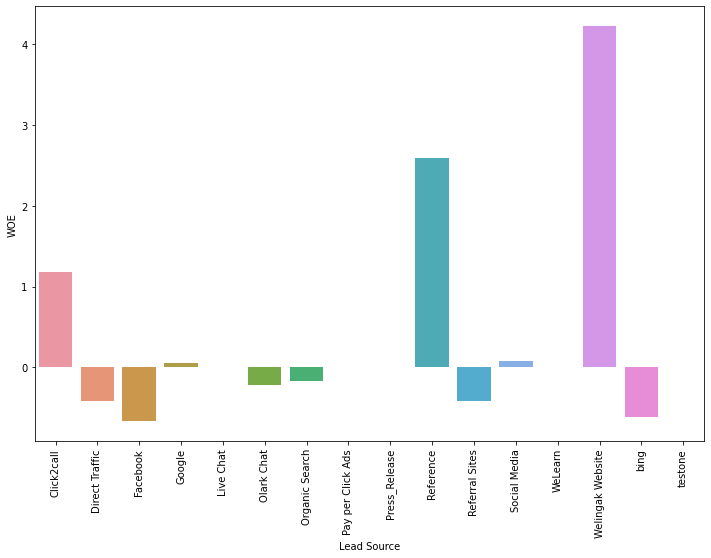

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(data =WOE_leadsource,x = WOE_leadsource.index,y="WOE" )
plt.xticks(rotation=90)
plt.show()

In [52]:
WOE_LastActivity = pd.crosstab(index = df['Last Activity'],columns = df["Converted"],normalize='columns')
WOE_LastActivity["WOE"] = WOE_LastActivity.apply(lambda x: np.log(x[1] / x[0]),axis=1)
WOE_LastActivity['WOE'] = WOE_LastActivity['WOE'].replace([np.inf, -np.inf], np.nan).fillna(0)
WOE_LastActivity['IV'] = WOE_LastActivity.apply(lambda x: np.sum(x['WOE']* (x[1]-x[0])),axis=1)
print("Last Activity_IV is {}".format(round(np.sum(WOE_LastActivity['IV']),2)))

Last Activity_IV is 0.6


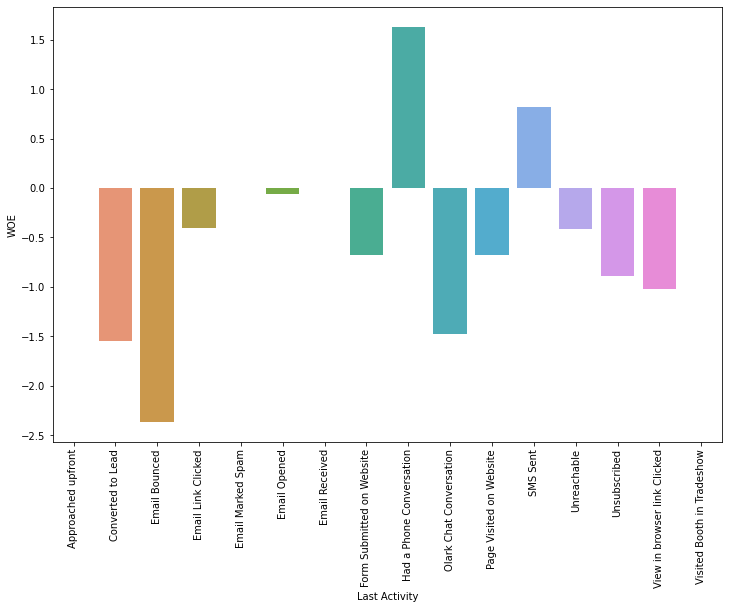

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(data =WOE_LastActivity,x = WOE_LastActivity.index,y="WOE" )
plt.xticks(rotation=90)
plt.show()

In [54]:
WOE_Specialization = pd.crosstab(index = df['Specialization'],columns = df["Converted"],normalize='columns')
WOE_Specialization["WOE"] = WOE_Specialization.apply(lambda x: np.log(x[1] / x[0]),axis=1)
WOE_Specialization['WOE'] = WOE_Specialization['WOE'].replace([np.inf, -np.inf], np.nan).fillna(0)
WOE_Specialization['IV'] = WOE_Specialization.apply(lambda x: np.sum(x['WOE']* (x[1]-x[0])),axis=1)
print("Specialization_IV is {}".format(round(np.sum(WOE_Specialization['IV']),2)))

Specialization_IV is 0.03


In [55]:
WOE_activity = pd.crosstab(index = df['Last Notable Activity'],columns = df["Converted"],normalize='columns')
WOE_activity["WOE"] = WOE_activity.apply(lambda x: np.log(x[1] / x[0]),axis=1)
WOE_activity['WOE'] = WOE_activity['WOE'].replace([np.inf, -np.inf], np.nan).fillna(0)
WOE_activity['IV'] = WOE_activity.apply(lambda x: np.sum(x['WOE']* (x[1]-x[0])),axis=1)
print("activity_IV is {}".format(round(np.sum(WOE_activity['IV']),2)))

activity_IV is 0.45


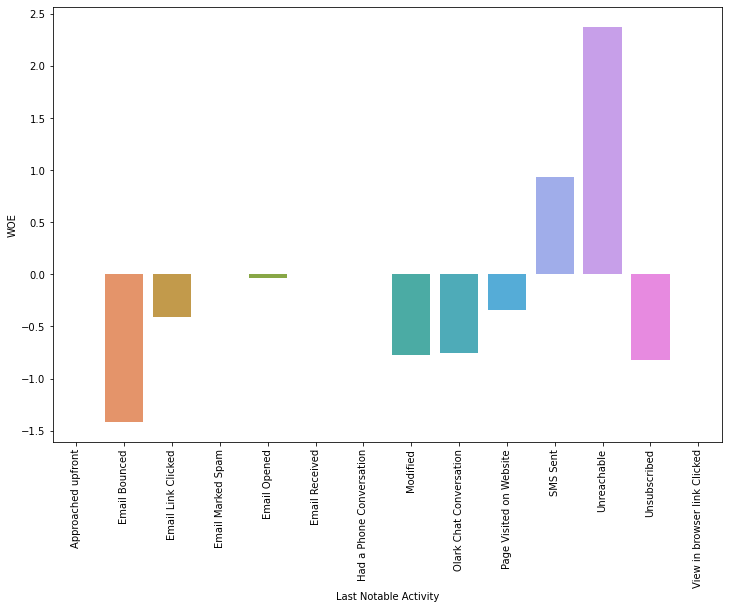

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(data =WOE_activity,x = WOE_activity.index,y="WOE" )
plt.xticks(rotation=90)
plt.show()

### Based on IV, Specialization can be dropped as it is Weak and also contains Nan, Select

In [57]:
df= df.drop("Specialization",axis = 1)

In [58]:
print("The data set has now {} features".format(df.shape[1]))

The data set has now 10 features


# Model Building

### Dummy variable creation

In [59]:
cats = df.select_dtypes("object").columns.to_list()

In [60]:
dummy_cats = pd.get_dummies(df[cats],drop_first=True)

In [61]:
df1 = pd.concat([df,dummy_cats],axis=1)

In [62]:
df1.drop(cats,axis=1,inplace=True)

In [63]:
df1.shape

(6372, 56)

In [64]:
df1.select_dtypes(["float","int"]).columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

### Test Train split

In [65]:
X = df1.drop(['Converted'], axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
y = df1['Converted']
y.head(3)

0    0
1    0
2    1
Name: Converted, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Scaling the numerical features

In [68]:
num_vars = X_train.select_dtypes(["int","float"]).columns.to_list()
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [69]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,...,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.000000,4460.0
mean,0.014440,0.234100,0.044937,0.570404,0.092601,0.005157,0.291031,0.005381,0.322422,0.000224,...,0.319058,0.000224,0.001345,0.303587,0.011659,0.034081,0.296413,0.002915,0.004260,0.0
std,0.021208,0.248909,0.039951,0.495074,0.289905,0.071635,0.454289,0.073167,0.467456,0.014974,...,0.466164,0.014974,0.036658,0.459858,0.107358,0.181457,0.456726,0.053916,0.065137,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.003984,0.013974,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.011952,0.123900,0.036364,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.019920,0.447623,0.063636,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### RFE through sklearn Logistic regression 

In [70]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 22),
 ('Lead Source_Press_Release', False, 28),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 7),
 ('Lead Source_WeLearn', False, 40),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 16),
 ('Lead Source_testone', False, 23),
 ('Last Activity_Converted to Lead', False, 14),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activit

### Select only features shorlisted by RFE

In [72]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'current occupation_Housewife',
       'current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [73]:
X_train = X_train[col]

### Fit Logistic regression model using statsmodel

In [74]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.6
Date:                Sun, 19 Mar 2023   Deviance:                       4167.3
Time:                        23:35:40   Pearson chi2:                 4.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.2519      0.096    -23.438      0.000      -2.440      -2.064
TotalVisits                                        8.3901      2.789      3.009      0.003       2.925      13.855
Total Time Spent on Website                        4.4164      0.185     23.899      0.000       4.054       4.779
Lead Origin_Lead Add Form                          2.4068      1.197      2.011      0.044       0.061       4.752
Lead Origin_Lead Import                            1.2996      0.467      2.786      0.005       0.385       2.214
Lead Source_Olark Chat                             1.7866      0.128     13.997      0.000       1.536       2.037
Lead Source_Reference                              1.4665      1.218      1.204      0.228      -0.920       3.853
Lead Source_Welingak Website                       3.1375      1.395      2.249      0.025       0.403       5.872
Last Activity_Email Bounced                       -1.7441      0.385     -4.532      0.000      -2.498      -0.990
Last Activity_Had a Phone Conversation             0.7004      1.418      0.494      0.621      -2.078       3.479
Last Activity_Olark Chat Conversation             -1.2937      0.187     -6.904      0.000      -1.661      -0.926
Last Activity_SMS Sent                             1.0329      0.082     12.564      0.000       0.872       1.194
current occupation_Housewife                      23.0433   1.59e+04      0.001      0.999   -3.11e+04    3.12e+04
current occupation_Working Professional            2.6982      0.202     13.362      0.000       2.302       3.094
Last Notable Activity_Had a Phone Conversation    22.5605   1.79e+04      0.001      0.999    -3.5e+04    3.51e+04
Last Notable Activity_Unreachable                  3.1233      1.085      2.878      0.004       0.996       5.251
==================================================================================================================
"""

### VIF Calculation

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif["pvals"] = np.around(res.pvalues.values,3)
vif = vif.sort_values(by = ["VIF","pvals"], ascending = [False,False])
vif

,Features,VIF,pvals
3,Lead Origin_Lead Add Form,62.63,0.044
6,Lead Source_Reference,49.69,0.228
7,Lead Source_Welingak Website,16.57,0.025
0,const,4.50,0.000
14,Last Notable Activity_Had a Phone Conversation,2.50,0.999
9,Last Activity_Had a Phone Conversation,2.50,0.621
5,Lead Source_Olark Chat,1.34,0.000
2,Total Time Spent on Website,1.28,0.000
10,Last Activity_Olark Chat Conversation,1.16,0.000
1,TotalVisits,1.13,0.003


### Lead Source_Reference has high VIF and pvals. Hence, should be dropped first

### Model-2 after reomoving "Lead Source_Reference"

In [76]:
X_train2 = X_train.drop("Lead Source_Reference",axis=1)

In [77]:
X_train2.shape

(4460, 14)

In [78]:
X_train2_sm = sm.add_constant(X_train2)
logm2 = sm.GLM(y_train,X_train2_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.2
Date:                Sun, 19 Mar 2023   Deviance:                       4168.4
Time:                        23:35:40   Pearson chi2:                 4.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -2.2504      0.096    -23.424      0.000      -2.439      -2.062
TotalVisits                                        8.3547      2.788      2.996      0.003       2.890      13.820
Total Time Spent on Website                        4.4137      0.185     23.885      0.000       4.052       4.776
Lead Origin_Lead Add Form                          3.8364      0.240     15.955      0.000       3.365       4.308
Lead Origin_Lead Import                            1.2980      0.467      2.782      0.005       0.384       2.212
Lead Source_Olark Chat                             1.7841      0.128     13.974      0.000       1.534       2.034
Lead Source_Welingak Website                       1.7063      0.753      2.266      0.023       0.230       3.182
Last Activity_Email Bounced                       -1.7440      0.385     -4.532      0.000      -2.498      -0.990
Last Activity_Had a Phone Conversation             0.7062      1.415      0.499      0.618      -2.068       3.480
Last Activity_Olark Chat Conversation             -1.2930      0.187     -6.901      0.000      -1.660      -0.926
Last Activity_SMS Sent                             1.0330      0.082     12.568      0.000       0.872       1.194
current occupation_Housewife                      23.0463   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
current occupation_Working Professional            2.6992      0.202     13.371      0.000       2.304       3.095
Last Notable Activity_Had a Phone Conversation    22.5556   1.79e+04      0.001      0.999   -3.51e+04    3.51e+04
Last Notable Activity_Unreachable                  3.1237      1.085      2.878      0.004       0.997       5.251
==================================================================================================================
"""

In [79]:
vif2 = pd.DataFrame()
vif2['Features'] = X_train2_sm.columns
vif2['VIF'] = [variance_inflation_factor(X_train2_sm.values, i) for i in range(X_train2_sm.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2["pvals"] = np.around(res2.pvalues.values,3)
vif2 = vif2.sort_values(by = ["VIF","pvals"], ascending = [False,False])
vif2

,Features,VIF,pvals
0,const,4.50,0.000
13,Last Notable Activity_Had a Phone Conversation,2.50,0.999
8,Last Activity_Had a Phone Conversation,2.50,0.618
3,Lead Origin_Lead Add Form,1.55,0.000
5,Lead Source_Olark Chat,1.34,0.000
6,Lead Source_Welingak Website,1.30,0.023
2,Total Time Spent on Website,1.27,0.000
9,Last Activity_Olark Chat Conversation,1.16,0.000
1,TotalVisits,1.13,0.003
10,Last Activity_SMS Sent,1.09,0.000


### Model-3 after removing "Last Notable Activity_Had a Phone Conversation" from Model-2

In [80]:
X_train3 = X_train2.drop("Last Notable Activity_Had a Phone Conversation",axis=1)

X_train3_sm = sm.add_constant(X_train3)
logm3 = sm.GLM(y_train,X_train3_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2085.9
Date:                Sun, 19 Mar 2023   Deviance:                       4171.8
Time:                        23:35:40   Pearson chi2:                 4.87e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.2522      0.096    -23.432      0.000      -2.441      -2.064
TotalVisits                                 8.5174      2.788      3.055      0.002       3.053      13.981
Total Time Spent on Website                 4.4104      0.185     23.875      0.000       4.048       4.772
Lead Origin_Lead Add Form                   3.8343      0.240     15.944      0.000       3.363       4.306
Lead Origin_Lead Import                     1.2999      0.467      2.786      0.005       0.385       2.214
Lead Source_Olark Chat                      1.7858      0.128     13.983      0.000       1.535       2.036
Lead Source_Welingak Website                1.7102      0.753      2.271      0.023       0.234       3.186
Last Activity_Email Bounced                -1.7432      0.385     -4.531      0.000      -2.497      -0.989
Last Activity_Had a Phone Conversation      2.7558      1.106      2.492      0.013       0.588       4.923
Last Activity_Olark Chat Conversation      -1.2929      0.187     -6.900      0.000      -1.660      -0.926
Last Activity_SMS Sent                      1.0331      0.082     12.571      0.000       0.872       1.194
current occupation_Housewife               23.0474   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
current occupation_Working Professional     2.6984      0.202     13.366      0.000       2.303       3.094
Last Notable Activity_Unreachable           3.1228      1.085      2.878      0.004       0.996       5.250
===========================================================================================================
"""

In [81]:
vif3 = pd.DataFrame()
vif3['Features'] = X_train3_sm.columns
vif3['VIF'] = [variance_inflation_factor(X_train3_sm.values, i) for i in range(X_train3_sm.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3["pvals"] = np.around(res3.pvalues.values,3)
vif3 = vif3.sort_values(by = ["VIF","pvals"], ascending = [False,False])
vif3

,Features,VIF,pvals
0,const,4.50,0.000
3,Lead Origin_Lead Add Form,1.55,0.000
5,Lead Source_Olark Chat,1.34,0.000
6,Lead Source_Welingak Website,1.30,0.023
2,Total Time Spent on Website,1.27,0.000
9,Last Activity_Olark Chat Conversation,1.16,0.000
1,TotalVisits,1.13,0.002
10,Last Activity_SMS Sent,1.09,0.000
12,current occupation_Working Professional,1.09,0.000
7,Last Activity_Email Bounced,1.03,0.000


### Model-4 after removing "current occupation_Housewife" from Model-3

In [82]:
X_train4 = X_train3.drop("current occupation_Housewife",axis=1)

X_train4_sm = sm.add_constant(X_train4)
logm4 = sm.GLM(y_train,X_train4_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2092.0
Date:                Sun, 19 Mar 2023   Deviance:                       4184.0
Time:                        23:35:40   Pearson chi2:                 4.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.2378      0.096    -23.375      0.000      -2.425      -2.050
TotalVisits                                 8.3278      2.780      2.996      0.003       2.879      13.777
Total Time Spent on Website                 4.4061      0.184     23.883      0.000       4.044       4.768
Lead Origin_Lead Add Form                   3.8399      0.240     15.987      0.000       3.369       4.311
Lead Origin_Lead Import                     1.2886      0.466      2.764      0.006       0.375       2.202
Lead Source_Olark Chat                      1.7758      0.127     13.930      0.000       1.526       2.026
Lead Source_Welingak Website                1.6939      0.753      2.249      0.024       0.218       3.170
Last Activity_Email Bounced                -1.7519      0.385     -4.555      0.000      -2.506      -0.998
Last Activity_Had a Phone Conversation      2.7490      1.106      2.486      0.013       0.581       4.917
Last Activity_Olark Chat Conversation      -1.2985      0.187     -6.934      0.000      -1.666      -0.931
Last Activity_SMS Sent                      1.0240      0.082     12.478      0.000       0.863       1.185
current occupation_Working Professional     2.6918      0.202     13.337      0.000       2.296       3.087
Last Notable Activity_Unreachable           3.1133      1.085      2.869      0.004       0.986       5.240
===========================================================================================================
"""

In [83]:
vif4 = pd.DataFrame()
vif4['Features'] = X_train4_sm.columns
vif4['VIF'] = [variance_inflation_factor(X_train4_sm.values, i) for i in range(X_train4_sm.shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4["pvals"] = np.around(res4.pvalues.values,3)
vif4 = vif4.sort_values(by = ["VIF","pvals"], ascending = [False,False])
vif4

,Features,VIF,pvals
0,const,4.49,0.000
3,Lead Origin_Lead Add Form,1.55,0.000
5,Lead Source_Olark Chat,1.34,0.000
6,Lead Source_Welingak Website,1.30,0.024
2,Total Time Spent on Website,1.27,0.000
9,Last Activity_Olark Chat Conversation,1.16,0.000
1,TotalVisits,1.13,0.003
10,Last Activity_SMS Sent,1.09,0.000
11,current occupation_Working Professional,1.09,0.000
7,Last Activity_Email Bounced,1.03,0.000


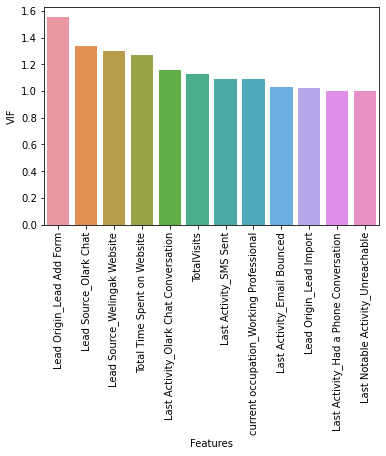

In [84]:
sns.barplot(data = vif4[1:],x= vif4["Features"][1:],y = vif4["VIF"][1:])
plt.xticks(rotation = 90)
plt.show()

### Predictions on the trained data set

In [85]:
y_train4_pred = res4.predict(X_train4_sm)
y_train4_pred[:10]

7186    0.377132
2628    0.126068
301     0.278637
3484    0.852913
6444    0.515695
2884    0.636909
6665    0.960057
3233    0.964000
6360    0.378264
5283    0.928374
dtype: float64

### Creating a dataframe with the actual and  predicted probabilities

In [86]:
y_train4_pred = y_train4_pred.values.reshape(-1)
y_train4_pred_final = pd.DataFrame({'Actual_Converted':y_train.values, 'Pred_Conver_Prob':y_train4_pred})
y_train4_pred_final['Predicted_Converted'] = y_train4_pred_final["Pred_Conver_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train4_pred_final.head()

,Actual_Converted,Pred_Conver_Prob,Predicted_Converted
0,1,0.377132,0
1,0,0.126068,0
2,1,0.278637,0
3,1,0.852913,1
4,0,0.515695,1


### Evaluation

In [87]:
#  overall accuracy.
print(round(metrics.accuracy_score(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Predicted_Converted"]),2))

0.78


In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Predicted_Converted"] )
print(confusion)

[[1911  389]
 [ 579 1581]]


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# sensitivity of our logistic regression model
sens = round(TP / float(TP+FN),2)
sens

0.73

In [91]:
# calculate specificity
speci = round(TN / float(TN+FP),2)
speci

0.83

In [92]:
# Calculate false postive rate - predicting converted when customer not converted (1-specificity)
FPR = round(FP/ float(TN+FP),2)
print(FPR)

0.17


In [93]:
# positive predictive value 
precision = round(TP / float(TP+FP),3)
print(precision)

0.803


In [94]:
# Negative predictive value
NPR = round(TN / float(TN+ FN),2)
print(NPR)

0.77


In [95]:
print ( metrics.classification_report( y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Predicted_Converted"]) )

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2300
           1       0.80      0.73      0.77      2160

    accuracy                           0.78      4460
   macro avg       0.79      0.78      0.78      4460
weighted avg       0.78      0.78      0.78      4460



In [96]:
print("Sensitivity or Recall --> {}".format(sens))
print("Specificity -->           {}".format(speci))
print("False positive rate -->   {}".format(FPR))
print("precision  -->            {}".format(precision))
print("Negative predicted value --> {}".format(NPR))

Sensitivity or Recall --> 0.73
Specificity -->           0.83
False positive rate -->   0.17
precision  -->            0.803
Negative predicted value --> 0.77


###  Plotting the ROC Curve

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Predicted_Converted"], drop_intermediate = False )

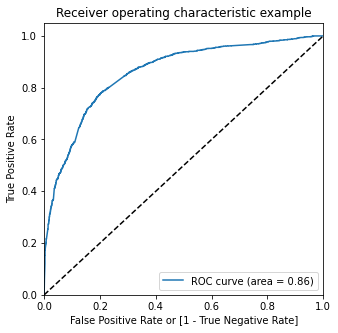

In [99]:
draw_roc(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Pred_Conver_Prob"])

### Finding Optimal Cutoff Probability (default used is 0.5)

In [100]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train4_pred_final[i]= y_train4_pred_final["Pred_Conver_Prob"].map(lambda x: 1 if x > i else 0)
y_train4_pred_final.head()

,Actual_Converted,Pred_Conver_Prob,Predicted_Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.377132,0,1,1,1,1,0,0,0,0,0,0
1,0,0.126068,0,1,1,0,0,0,0,0,0,0,0
2,1,0.278637,0,1,1,1,0,0,0,0,0,0,0
3,1,0.852913,1,1,1,1,1,1,1,1,1,1,0
4,0,0.515695,1,1,1,1,1,1,1,0,0,0,0


In [101]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train4_pred_final["Actual_Converted"], y_train4_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484305  1.000000  0.000000
0.1   0.1  0.519058  0.993981  0.073043
0.2   0.2  0.709193  0.938889  0.493478
0.3   0.3  0.756502  0.893519  0.627826
0.4   0.4  0.785650  0.796759  0.775217
0.5   0.5  0.782960  0.731944  0.830870
0.6   0.6  0.771973  0.673611  0.864348
0.7   0.7  0.731614  0.536111  0.915217
0.8   0.8  0.708072  0.443981  0.956087
0.9   0.9  0.646413  0.288426  0.982609


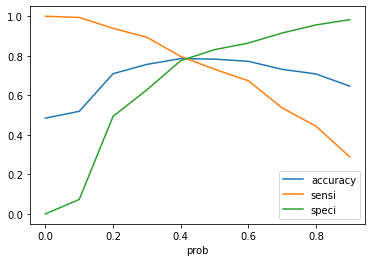

In [102]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.4 is the optimum cutoff probability

In [103]:
y_train4_pred_final['final_predicted'] = y_train4_pred_final["Pred_Conver_Prob"].map( lambda x: 1 if x > 0.4 else 0)

y_train4_pred_final.head()

,Actual_Converted,Pred_Conver_Prob,Predicted_Converted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.377132,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.126068,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.278637,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.852913,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.515695,1,1,1,1,1,1,1,0,0,0,0,1


### Evaluation with optimal cut-off

In [104]:
accur = round(metrics.accuracy_score(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["final_predicted"]),2)

confusion = metrics.confusion_matrix(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["final_predicted"] )

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sens = round(TP / float(TP+FN),2)
speci = round(TN / float(TN+FP),2)
precision = round(TP / float(TP+FP),3)
NPR = round(TN / float(TN+ FN),2)
FPR = round(FP/ float(TN+FP),2)

print("Accuracy --> {}".format(accur))
print("Sensitivity or Recall --> {}".format(sens))
print("Specificity -->           {}".format(speci))
print("False positive rate -->   {}".format(FPR))
print("precision  -->            {}".format(precision))
print("Negative predicted value --> {}".format(NPR))

Accuracy --> 0.79
Sensitivity or Recall --> 0.8
Specificity -->           0.78
False positive rate -->   0.22
precision  -->            0.769
Negative predicted value --> 0.8


In [105]:
print ( metrics.classification_report( y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Predicted_Converted"]) )

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2300
           1       0.80      0.73      0.77      2160

    accuracy                           0.78      4460
   macro avg       0.79      0.78      0.78      4460
weighted avg       0.78      0.78      0.78      4460



### from sklearn utilities

In [106]:
precision_score(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["final_predicted"])

0.7689901697944593

In [107]:
recall_score(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["final_predicted"])

0.7967592592592593

### Precision/Recall Trade-off

In [108]:
p, r, thresholds = precision_recall_curve(y_train4_pred_final["Actual_Converted"], y_train4_pred_final["Pred_Conver_Prob"])

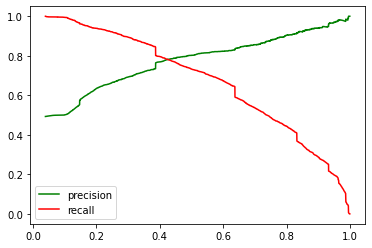

In [109]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(["precision","recall"])
plt.show()

# Making predictions on the test set

### Transform test numerial features

In [110]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

### Drop columns

In [111]:
X_train4.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [112]:
X_test4 = X_test[X_train4.columns.to_list()]

In [113]:
X_test4.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Making predictions on the test set

In [114]:
X_test4_sm = sm.add_constant(X_test4)

In [115]:
y_test_pred = res4.predict(X_test4_sm)

In [116]:
y_test_pred

2842    0.125877
6287    0.386495
3938    0.386495
4675    0.986875
8116    0.440378
          ...   
8975    0.370042
2967    0.406357
6657    0.190357
443     0.123039
5354    0.189792
Length: 1912, dtype: float64

### Test predcited and Actual DF

In [117]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [119]:
y_test_pred_final.head(5)

,Converted,0
0,0,0.125877
1,0,0.386495
2,0,0.386495
3,1,0.986875
4,0,0.440378


In [120]:
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Predcited_probability'})

In [121]:
y_test_pred_final['final_predicted'] = y_test_pred_final["Predcited_probability"].map(lambda x: 1 if x > 0.4 else 0)

In [122]:
y_test_pred_final

,Converted,Predcited_probability,final_predicted
0,0,0.125877,0
1,0,0.386495,0
2,0,0.386495,0
3,1,0.986875,1
4,0,0.440378,1
...,...,...,...
1907,0,0.370042,0
1908,1,0.406357,1
1909,0,0.190357,0
1910,1,0.123039,0


### Evaluation on Test data set

In [123]:
print ( metrics.classification_report( y_test_pred_final["Converted"], y_test_pred_final["final_predicted"]) )

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1007
           1       0.77      0.81      0.79       905

    accuracy                           0.79      1912
   macro avg       0.79      0.79      0.79      1912
weighted avg       0.79      0.79      0.79      1912



In [124]:
accur = round(metrics.accuracy_score(y_test_pred_final["Converted"], y_test_pred_final["final_predicted"]),2)

confusion = metrics.confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["final_predicted"] )

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

sens = round(TP / float(TP+FN),2)
speci = round(TN / float(TN+FP),2)
precision = round(TP / float(TP+FP),3)
NPR = round(TN / float(TN+ FN),2)
FPR = round(FP/ float(TN+FP),2)

print("Accuracy --> {}".format(accur))
print("Sensitivity or Recall --> {}".format(sens))
print("Specificity -->           {}".format(speci))
print("False positive rate -->   {}".format(FPR))
print("precision  -->            {}".format(precision))
print("Negative predicted value --> {}".format(NPR))

Accuracy --> 0.79
Sensitivity or Recall --> 0.81
Specificity -->           0.78
False positive rate -->   0.22
precision  -->            0.766
Negative predicted value --> 0.82


### Important Features

# Summary

In [125]:
X_train4.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Lead conversion target can be achieved by
#### 1) X education portal by providing more information about courses and make customer to spend enough time.
#### 2) Carefully review Add form by asking more relevant information about customer.
#### 3) Identify more industry relevant courses and customize courses for working professional.
#### 4) Olark chat and SMS preferred model of communication
#### 5) Focus on Welingak website 
